In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("preprocessed_data.csv")
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year
0,0.282525,0.0,0.048866,0.927507,0.5,0.0,0.000000,0.283587,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1999
1,0.081274,1.0,0.058705,0.072068,0.5,1.0,1.000000,0.031419,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2009
2,0.770765,0.0,0.051037,0.468288,0.5,0.0,0.000000,0.158115,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1999
3,0.871986,1.0,0.000000,0.640093,0.5,1.0,0.333333,0.053555,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998
4,0.260494,0.0,0.000000,0.095805,1.0,1.0,0.000000,0.073651,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1987


In [4]:
X = data.drop("Item_Outlet_Sales", axis = 1)
y = data["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [5]:
print(f"Train data shape: {X_train.shape} \n Test data shape: {X_test.shape}")

Train data shape: (6392, 34) 
 Test data shape: (2131, 34)


In [6]:

from keras import Sequential
from keras.layers import InputLayer, Dense
 # defining the layers
input_neurons = X_train.shape[1]
output_neurons = 1
no_of_hidden_layers = 3
neurons_hidden_layer_1 = 50
neurons_hidden_layer_2 = 10

#defining the activation functions
#hidden layers have relu activation function and since output is binary classficiation
# output layer has sigmoid activation function

#model architecture

model = Sequential()
model.add(InputLayer(input_shape = (input_neurons,)))
model.add(Dense(units = neurons_hidden_layer_1, activation="relu"))
model.add(Dense(units=neurons_hidden_layer_2, activation = "relu"))
model.add(Dense(units = output_neurons, activation = "linear"))

c:\Users\scientist-ns\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         1,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,271 (8.87 KB)

 Trainable params: 2,271 (8.87 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Define RMSE as a custom loss function
import tensorflow as tf
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [27]:
model.compile(optimizer='Adam', loss=rmse, metrics=[rmse])

In [28]:
model_history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs = 1000)

Epoch 1/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.9604 - rmse: 5.9604 - val_loss: 4.6178 - val_rmse: 4.6183
Epoch 2/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6265 - rmse: 3.6266 - val_loss: 4.4638 - val_rmse: 4.4644
Epoch 3/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5620 - rmse: 3.5620 - val_loss: 4.3032 - val_rmse: 4.3037
Epoch 4/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5009 - rmse: 3.5009 - val_loss: 4.4024 - val_rmse: 4.4030
Epoch 5/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4420 - rmse: 3.4420 - val_loss: 4.2539 - val_rmse: 4.2545
Epoch 6/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3890 - rmse: 3.3890 - val_loss: 4.3373 - val_rmse: 4.3379
Epoch 7/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3394 - rmse: 3.3394 - val_loss: 4.1840 - val_rmse: 4.1846
Epoch 8/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2879 - rmse: 3.2880 - val_loss: 4.1959 - val_rmse: 4.1965
Epoch 9/1000
200/200 ━━━

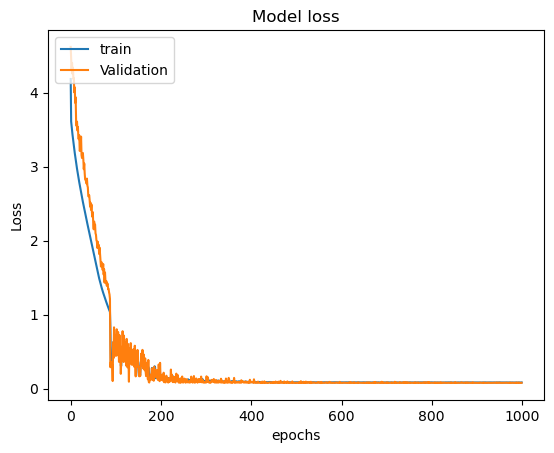

In [30]:
import matplotlib.pyplot as plt
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(["train","Validation"], loc = "upper left")
plt.show()

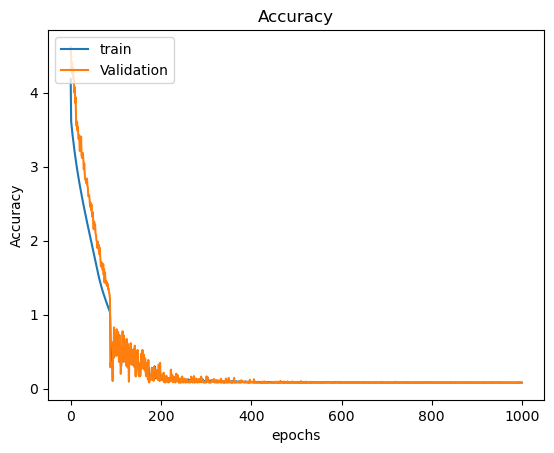

In [32]:
import matplotlib.pyplot as plt
plt.plot(model_history.history["rmse"])
plt.plot(model_history.history["val_rmse"])
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(["train","Validation"], loc = "upper left")
plt.show()

In [33]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs = 250)

Epoch 1/250
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0859 - rmse: 0.0859 - val_loss: 0.0792 - val_rmse: 0.0796
Epoch 2/250
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0874 - rmse: 0.0874 - val_loss: 0.0787 - val_rmse: 0.0790
Epoch 3/250
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0840 - rmse: 0.0840 - val_loss: 0.0788 - val_rmse: 0.0791
Epoch 4/250
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0848 - rmse: 0.0848 - val_loss: 0.0799 - val_rmse: 0.0802
Epoch 5/250
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0850 - rmse: 0.0850 - val_loss: 0.0787 - val_rmse: 0.0790
Epoch 6/250
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0859 - rmse: 0.0859 - val_loss: 0.0799 - val_rmse: 0.0803
Epoch 7/250
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0864 - rmse: 0.0864 - val_loss: 0.0795 - val_rmse: 0.0799
Epoch 8/250
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0850 - rmse: 0.0850 - val_loss: 0.0809 - val_rmse: 0.0813
Epoch 9/250
200/200 ━━━━━━━━━━━━

In [36]:
prediction=model.predict(X_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
y_test_np = np.array(y_test)
prediction_np = np.array(prediction)

# Calculate RMSE
rmse_value = rmse(y_test_np, prediction_np)

In [40]:
rmse_value

<tf.Tensor: shape=(), dtype=float64, numpy=0.17043823826394758>

In [41]:
df_test = pd.read_csv("test_preprocessed_data.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Fat_Content                 5681 non-null   float64
 2   Item_Visibility                  5681 non-null   float64
 3   Item_MRP                         5681 non-null   float64
 4   Outlet_Size                      5681 non-null   float64
 5   Outlet_Location_Type             5681 non-null   float64
 6   Outlet_Type                      5681 non-null   float64
 7   Item_Type_Baking Goods           5681 non-null   float64
 8   Item_Type_Breads                 5681 non-null   float64
 9   Item_Type_Breakfast              5681 non-null   float64
 10  Item_Type_Canned                 5681 non-null   float64
 11  Item_Type_Dairy                  5681 non-null   float64
 12  Item_Type_Frozen Foo

In [42]:
prediction=model.predict(df_test)

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [43]:
y_test_np = np.array(y_test)
prediction_np = np.array(prediction)

# Calculate RMSE
rmse_value = rmse(y_test_np, prediction_np)

In [45]:
rmse_value

<tf.Tensor: shape=(), dtype=float64, numpy=0.17189548100504387>

In [47]:
prediction=model.predict(df_test)

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
prediction

array([[0.16060036],
       [0.13681492],
       [0.05439608],
       ...,
       [0.16261628],
       [0.326101  ],
       [0.13274069]], dtype=float32)